In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
annType = ['segm','bbox','keypoints']
annType = annType[2]      #specify type here
prefix = 'person_keypoints' if annType=='keypoints' else 'instances'
print ('Running demo for *%s* results.'%(annType))

Running demo for *keypoints* results.


In [3]:
#initialize COCO ground truth api
dataDir='/media/ocrv/2c7cbc9f-1131-42b0-bf15-5d794478ec09/home/ocrv/Data/COCO'
dataType='val2014'
annFile = '%s/annotations/%s_%s.json'%(dataDir,prefix,dataType)
cocoGt=COCO(annFile)

loading annotations into memory...
Done (t=2.04s)
creating index...
index created!


In [5]:
#initialize COCO detections api
fake_results_dir = '/home/ocrv/Projects/cocoapi'
resFile='%s/results/%s_%s_fake%s100_results.json'
resFile = resFile%(fake_results_dir, prefix, dataType, annType)
cocoDt=cocoGt.loadRes(resFile)

Loading and preparing results...
DONE (t=0.08s)
creating index...
index created!


In [139]:
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds)
annIds = coco.getAnnIds(imgIds=imgIds)

In [141]:
imgs_anns = coco.loadImgs(ids=imgIds)

In [114]:
catIds = coco.getCatIds(catNms=['person']);
annIds = coco.getAnnIds(catIds=catIds)
anns = coco.loadAnns(ids=annIds)

In [121]:
imgIds = [ann['image_id'] for ann in anns]

In [127]:
coco.imgs[257]['file_name']

'COCO_val2014_000000000257.jpg'

In [131]:
annIds[0]

1

In [134]:
coco.imgs[anns[annIds[0]]['image_id']]

{'license': 1,
 'file_name': 'COCO_val2014_000000000136.jpg',
 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000000136.jpg',
 'height': 374,
 'width': 500,
 'date_captured': '2013-11-17 01:42:35',
 'flickr_url': 'http://farm1.staticflickr.com/90/206826531_339a965783_z.jpg',
 'id': 136}

In [128]:
img_names = [coco.imgs[i]['file_name'] for i in imgIds]

In [129]:
img_names

['COCO_val2014_000000000136.jpg',
 'COCO_val2014_000000000136.jpg',
 'COCO_val2014_000000000139.jpg',
 'COCO_val2014_000000000192.jpg',
 'COCO_val2014_000000000192.jpg',
 'COCO_val2014_000000000192.jpg',
 'COCO_val2014_000000000241.jpg',
 'COCO_val2014_000000000241.jpg',
 'COCO_val2014_000000000241.jpg',
 'COCO_val2014_000000000241.jpg',
 'COCO_val2014_000000000241.jpg',
 'COCO_val2014_000000000257.jpg',
 'COCO_val2014_000000000257.jpg',
 'COCO_val2014_000000000257.jpg',
 'COCO_val2014_000000000257.jpg',
 'COCO_val2014_000000000294.jpg',
 'COCO_val2014_000000000328.jpg',
 'COCO_val2014_000000000328.jpg',
 'COCO_val2014_000000000328.jpg',
 'COCO_val2014_000000000338.jpg',
 'COCO_val2014_000000000338.jpg',
 'COCO_val2014_000000000395.jpg',
 'COCO_val2014_000000000395.jpg',
 'COCO_val2014_000000000395.jpg',
 'COCO_val2014_000000000395.jpg',
 'COCO_val2014_000000000395.jpg',
 'COCO_val2014_000000000395.jpg',
 'COCO_val2014_000000000395.jpg',
 'COCO_val2014_000000000395.jpg',
 'COCO_val2014

In [107]:
values = list(cocoGt.anns.values())

In [110]:
values[:10][0]['bbox']

[267.03, 104.32, 229.19, 320]

In [50]:
ann_ids = cocoGt.getAnnIds(imgIds=[136])

In [53]:
anns = cocoGt.loadAnns(ids=ann_ids)

In [68]:
coco = cocoDt

In [81]:
#get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
# imgIds = coco.getImgIds()

In [91]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I = io.imread(img['coco_url'])

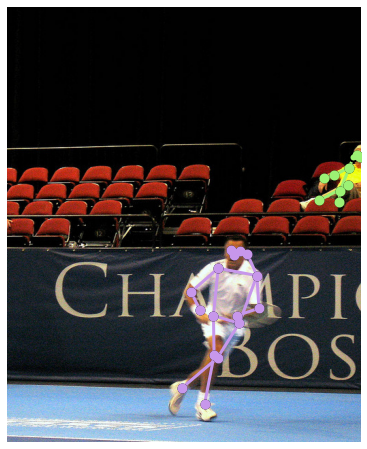

In [92]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [6]:
imgIds=sorted(cocoGt.getImgIds())
imgIds=imgIds[0:100]
imgId = imgIds[np.random.randint(100)]

In [7]:
# running evaluation
cocoEval = COCOeval(cocoGt,cocoDt,annType)
cocoEval.params.imgIds  = imgIds
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()

Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.08s).
Accumulating evaluation results...
DONE (t=0.00s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.372
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.636
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.348
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = 0.384
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.386
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.514
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.734
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.504
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = 0.508
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.522
